In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd '/content/drive/My Drive/Colab Notebooks/Natural language processing'

/content/drive/My Drive/Colab Notebooks/Natural language processing


# Lab 1: Text Corpora and Language Modelling

Welcome to the first lab assignment of INFOMNLP 2020. 

This lab is meant to help you get familiar with some language data, and use this data to estimate simple models called N-gram language models.

First you will use the **Penn Treebank**, which is a collection of newspaper articles from the newspaper 
The Wall Street Journal. The idea is to examine the data and notice interesting properties. This will not take more than a few lines of code. The Penn Treebank may be the most widely used corpus in NLP.

Then you will use a corpus consisting of **TedX** talks. This you will use to estimate an **N-gram language model** for different orders of N, and use this this for some tasks.

The datasets are on Blackboard. Download the zip and make sure to put the files in the same directory as the notebook.

### Rules
* The lab exercises should be made in **groups of two people**.

* The assignment should submitted to **Blackboard** as `.ipynb`. Only **one submission per group**.

* The **filename** should be `lab1_id1_id2.ipynb`.
 
* The questions marked **Extra** or **Optional** are an additional challenge for those interested in going the extra mile. 

* We may not grade all sub-questions (instead, we may choose a sub-set and scale the points). However, solve them as if they were.

Notes on implementation:

* You should **write your code and answers in this iPython Notebook**. (See http://ipython.org/notebook.html for reference material.) If you have problems, please contact your teaching assistant.

* Use only **one cell for code** and **one cell for markdown** answers!    

    * Put all code in the cell with the `# YOUR CODE HERE` comment.
    
    * For theoretical questions, put your solution in the YOUR ANSWER HERE cell.
    
* Test your code and **make sure we can run your notebook**

# 1. Penn treebank

## Exercise 1.1 
(40 points, 5 points per subquestion )

You are provided with a corpus containing words with their Part-of-Speech tags (POS-tags for short). The format is
**word|POS** (one sentence per line) and the file name is **sec02-22.gold.tagged**. This data is extracted from Sections 02-22 from the Penn Treebank: these sections are most commonly used for training statistical models like POS-taggers and parsers.

**[Hint]** **Figure 8.1** in chapter 8 of Jurafsky and Martin (see (https://web.stanford.edu/~jurafsky/slp3/8.pdf)) holds a summary of the 45 POS-tags used in the Penn Treebank tagset together with their meaning and some examples. (If you are keen on learning more about the word-classes represented POS-tags and their definitions you can do a litle reading ahead for next week and already have a look at section 8.1 of the same chapter).

**[Hint]** the Python library [collections](https://docs.python.org/2/library/collections.html) has an object called `Counter` which will come in handy for this exercise.

**(a)** How large is the corpus? (i.e. how **many tokens**). And what is the size of the **vocabulary** used in this corpus? 

Estimate the vocabulary size both by **lowercasing** all the words as well as by leaving the words in their **original orthography**. What is an advantage of lowercasing all the words in your corpus? What is a notable downside? **Give examples.**

In [ ]:
# Imports
from collections import Counter

# Define data path
# NB: CHECK IF CORRECT
path = 'data/sec02-21.gold.tagged'

# Load POS-tagged words into Python
file = open(path, 'r', encoding = 'latin1')
data = file.read()

# Create word lists and Counter dictionary
wordDumpList = data.split()
wordDict = dict(Counter(wordDumpList))
wordDumpListLower = [word.lower() for word in wordDumpList]

print('Corpus Size:             ', len(wordDumpList))
print('Vocabulary size (normal):', len(wordDict))
print('Vocabulary size (lower): ', len(set(wordDumpListLower)))

FileNotFoundError: [Errno 2] No such file or directory: 'data/sec02-21.gold.tagged'

***Answer***

*\+ Lowercasing is almost always advantageous, because it riddens cases where the same word is being treated as two different words because one of them starts a sentence, e.g. considering "The" and "the" as the same.*


*\- Lowercasing all words can cause loss of context with words that normally incorporate capitals outside of sentence starts, such as names ('Julia' and 'julia') or as acronyms ('IKEA' and 'ikea'), though this usually does not have large implications for the algorithm when it comes to linguistic interpretation. One exception is where the distinction between uppercase and lowercase clearly matters, such as the prediction of code of a certain programming language.*

------
For the rest of this exercise you should use the **original orthography** of the data when answering the questions.

------


**(b)** Plot a graph of word frequency versus rank of a word, in this corpus. Does this corpus obey **Zipf’s law**?

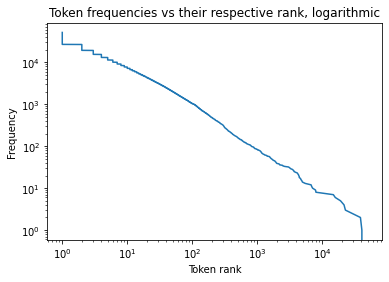

In [ ]:
# Rank tokens in descending order                                   
wordDict = {k: v for k, v in sorted(wordDict.items(),
                                    reverse=True, key=lambda item: item[1])}
wordFreqs = list(wordDict.values())
wordRanks = range(len(wordFreqs))

# Plot frquencies vs. rank diagram
plt.plot(wordFreqs, wordRanks)
plt.xscale('log'), plt.yscale('log')
plt.xlabel('Token rank'), plt.ylabel('Frequency')
plt.title('Token frequencies vs their respective rank, logarithmic')
plt.show()

*Yes, this corpus obeys Zipf's law, as the graph follow mostly a straight line on a logarithmic scale. This implies that there is an exponential correlation between word rank and frequency.*

**(c)** What are the **20 most common words** in the corpus and how often do they occur? What is the 50th most common word, the 100th and the 1000th and how often do they occur?

In [ ]:
# Split words from full tokens (i.e. filter out POS tags first), then zip back.
wordListWords = [el.split('|')[0] for el in wordDict]
wordZiplist = list(zip(wordListWords, wordDict.values()))
print('The 20 most common words & their occurences:\n', wordZiplist[0:20], '\n')

print('#50:  ', wordZiplist[49])
print('#100: ', wordZiplist[99])
print('#1000:', wordZiplist[999])

The 20 most common words & their occurences:
 [(',', 48310), ('the', 40831), ('.', 38798), ('of', 22778), ('to', 21676), ('a', 19151), ('and', 15901), ('in', 14852), ("'s", 8023), ('for', 7907), ('$', 7125), ('is', 6891), ('The', 6753), ('said', 5476), ('on', 4965), ('%', 4866), ('that', 4719), ('it', 4639), ('by', 4438), ('from', 4437)] 

#50:   ('his', 1688)
#100:  ('companies', 817)
#1000: ('Judge', 106)


**(d)** How many different Part-of-speech tags are present in the corpus?

In [ ]:
# Split POS tags from full tokens (i.e. filter out words first).
wordListPOS = [el.split('|')[1] for el in wordDict]
print('Amount of different POS tags in corpus:', len(set(wordListPOS)))

Amount of different POS tags in corpus: 48


**(e)** Print a list of the **10 most commonly occurring POS tags** in the data. For each of these POS tags, what are the **3 most common words** that belong to that class?

In [ ]:
# Collect all occurences of every POS and sort in descending order
POSDict = dict(Counter(wordListPOS))
POSDict = {k: v for k, v in sorted(POSDict.items(),
                                   reverse=True, key=lambda item: item[1])}
POSCommon = list(POSDict.keys())[0:10]
print('Most commonly occuring POS tags:\n', POSCommon, '\n')

# Initiate 3-tupled sorted list with words, POStag, and their count
wordTripleZiplist = list(zip(wordListWords, wordListPOS, wordDict.values()))

# Function that returns the three most common tokens with a given POS tag
def find_belonging(POStag):
  mostCommons = []

  # Iterate over corpus size
  for i in range(len(wordTripleZiplist)):

    # Only finds first three occurences; increases efficiency drastically
    if len(mostCommons) < 3:

      # If a match is found in POStag list, return the corresponding full token
      if POStag == wordTripleZiplist[i][1]:
        mostCommons.append(wordTripleZiplist[i])

  return(mostCommons)

# Run function with ten most common POS tags
POSCommonWords = [find_belonging(POSTag) for POSTag in POSCommon]

print('... and their corresponding words:')
POSCommonWords

NameError: name 'wordListPOS' is not defined

**(f)** A single word may have several POS-tags. For example, *record* can be a both a **noun** *(buy a record)* or a **verb** *(record a lecture)*. This make POS-tags extremely useful for **disambiguation**.

What percentage of the words in the vocabulary is **ambiguous**? (i.e. have more than one POS tag?) What are the 10 most frequent combinations of POS tags in the case of ambitguity? Which words are **most ambiguous**? Give some of them.

In [ ]:
cnt = Counter();
for word in wordDumpListLower:  
  cnt[word] += 1


words = {}

# cnt.most_common(100)
for word in cnt.most_common(9999999):
  reWord = word[0].split('|')[0]
  if reWord in words:
    words[reWord].append(word)
  else:
    words[reWord] = [word]

# words = {k: v for k, v in sorted(words.items(), reverse=True, key=lambda item: len(item[1]))}

# words

# for elem in sorted(words.items(), reverse=True) :
#   print(elem[0] , " ::" , len(elem[1]) )

listofTuples = sorted(words.items(),reverse=True, key=lambda x: len(x[1]))

ambiguousWords = []
# Iterate over the sorted sequence
for elem in listofTuples:
  if len(elem[1]) > 1:
    ambiguousWords.append(elem)

print(len(listofTuples), "::", len(ambiguousWords))
print("percentage: ", (len(ambiguousWords)/len(listofTuples))*100)

for elem in listofTuples[:10]:
  print(elem[0] , " ::" , elem[1] )

NameError: name 'wordDumpListLower' is not defined

In [ ]:
listofTuples = sorted(words.items(),reverse=True, key=lambda x: x[1][0][1])

for elem in listofTuples[:100]:
  print(elem[0] , " ::" , elem[1] )
    
print(len(ambiguousWords))

NameError: name 'words' is not defined

**(g)**  Print some of these words with their multiple POS-tags. Do you **understand the ambiguity**? Use figure 10.1 mentioned above to interpret the POS-tags.

In [ ]:
for elem in listofTuples[:5]:
  print(elem[0] , " ::" , elem[1] )

,  :: [(',|,', 48310)]
the  :: [('the|dt', 47619), ('the|nnp', 43), ('the|jj', 2), ('the|nn', 1), ('the|vb', 1)]
.  :: [('.|.', 38798)]
of  :: [('of|in', 22854), ('of|rp', 2), ('of|rb', 2)]
to  :: [('to|to', 21830), ('to|cc', 375), ('to|in', 5)]


**(h)** Ambiguous words do not account for a great percentage of the vocabulary. Yet they are among the most commonly occuring words of the English language. What **percentage of the dataset is ambiguous**?

In [ ]:
listofTuples = sorted(words.items(),reverse=True, key=lambda x: len(x[1]))

ambiguousWords = []
# Iterate over the sorted sequence
for elem in listofTuples:
  if len(elem[1]) > 1:
    ambiguousWords.append(elem)
    # print(elem[0] , " ::" , elem[1] )

print(len(listofTuples), "::", len(ambiguousWords))
print("percentage: ", (len(ambiguousWords)/len(listofTuples))*100)

ambiguousTokens = 0
for elem in ambiguousWords:
  for element in elem[1]:
    ambiguousTokens += element[1]

print((ambiguousTokens /len(wordDumpListLower)) * 100)

39384 :: 6566
percentage:  16.671744871013612
64.14810575416975


## Exercise 1.2 
(10 points, 5 per subquestion)

You are also provided with another file called **sec00.gold.tagged**. 
Section 00 of the Penn Treebank is typically used as development data.

**(a)** How many **unseen words** are present in the development data (i.e., words that have not occurred in the training data)?

In [ ]:
# Define data path
# NB: CHECK IF CORRECT
pathDev = 'sec00.gold.tagged'

# Load POS-tagged words into Python
fileDev = open(pathDev, 'r', encoding = 'latin1')
dataDev = fileDev.read()

wordDevDumpList = dataDev.split()

# Subtract normal set from development set to find unseen words
# NB: Takes a little while
wordDevUnseen = [word for word in wordDevDumpList if word not in wordDumpList]
print('Number of unseen words:', len(wordDevUnseen))

Number of unseen words: 1982


**(b)** What are the three **POS tag categories** that the most **unseen words** belong to?

In [ ]:
# Split POS tags from full tokens and convert to counted, sorted dictionary
wordUnseenPOS = [el.split('|')[1] for el in wordDevUnseen]
wordUnseenDict = dict(Counter(wordUnseenPOS))
wordUnseenDict = {k: v for k, v in sorted(wordUnseenDict.items(),
                                   reverse=True, key=lambda item: item[1])}

# Grab top three
commonUnseenPOS = [item[0] for item in list(zip(wordUnseenDict.keys()))[0:3]]

print('Most common unseen word POS tags:', commonUnseenPOS)

Most common unseen word POS tags: ['NNP', 'JJ', 'NN']


# 2. Language Models

This part of the lab will be covered next week. If you have prior exposure to NLP, go ahead and finish this part! If you don't, start anyway, and this part will be clear after the lecture. 

Reference **chapter 3** of JM3 *Language Modeling with N-Grams*. 

----------

Models that assign **probabilities** to **sequences of words** are called language **language
modelels** or **LMs**. The simplest model that assigns probabilities to sentences and sequences of words is the **N-gram** model.

Recall that an *N*-gram language model uses **conditional probabilities** of the form
    
$$P(w_k \mid w_{k-N+1} \dots w_{k-1})$$

to **approximate** the full **joint probability**

$$P(w_1 \dots w_n)$$

of a sequence of words $w_1 \dots w_n$.

The easiest way of obtaining estimates for the probabilities $P(w_k \mid w_{k-N+1} \dots w_{k-1})$ is to use the **maximum likelihood estimate** or **MLE**, a widely used statistical estimation method (https://en.wikipedia.org/wiki/Maximum_likelihood_estimation). You count and normalize:

$$P_{MLE}(w_k \mid w_{k-N+1} \dots w_{k-1}) = \frac{C(w_{k-N+1} \dots w_{k-1} w_k)}{C(w_{k-N+1} \dots w_{k-1})}.$$


## Exercise 2.1 
(25 points, 15 and 10 for a and b)

**(a) ** Complete the function `train_ngram` so that you can train a count-based $N$-gram language model on the data found in `data/ted-train.txt` and train this for $N=2,3,4$. 

**(b) ** Extend the function above so that it accepts a parameter `k` for optional add-$k$ smoothing. 

**[Datastructure hint]** If you store the smoothed language in a naive manner (that is, to store *all* the numbers separately) your datastructure will get huge! If $V$ is the vocabulary then the smoothed bigram model assigns probabilities to $|V|^2$ entries. If $|V|$ is around 80k, the naive way requires you to store more than 64 billion floats. Yet almost all of these are actually just $P(w_n|w_{n-1}) = \frac{k}{N + k|V|}$, with $k$ the value with which you smooth and $N=C(w_{n-1})$. Think about how you use this fact to make your model work in practice.

In [ ]:
def normalize(counter):
    total = float(sum(counter.values()))
    return dict((word, count/total) for word, count in counter.items())

**[Python hint]** The `collections` library has another useful datastructure: the `defaultdict`. Some example uses: **[DELETED BY USER]**

The following function is given:

In [ ]:
from collections import defaultdict

train_file = "ted-train.txt"

def read(fname, max_lines=np.inf):
    """
    Reads in the data in fname and returns it as
    one long list of words. Also returns a vocabulary in
    the form of a word2index and index2word dictionary.
    """
    data = []
    # w2i will automatically keep a counter to asign to new words
    w2i = defaultdict(lambda: len(w2i))
    i2w = dict()
    start = "<s>"
    end = "</s>"
    
    with open(fname, "r") as fh:
        for k, line in enumerate(fh):
            if k > max_lines:
                break
            words = line.strip().split()
            # assign an index to each word
            for w in words:
                i2w[w2i[w]] = w # trick
            
            sent = [start] + words + [end]
            data.append(sent)

    return data, w2i, i2w

data, w2i, i2w = read(train_file)

In [ ]:
def train_ngram(data, N, k=0):
    """
    Trains an n-gram language model with optional add-k smoothing
    and additionaly returns the unigram model
    
    :param data: text-data as returned by read
    :param N: (N>1) the order of the ngram e.g. N=2 gives a bigram
    :param k: optional add-k smoothing
    :returns: ngram and unigram
    """
    
    print('  (a) Counting probabilities...')
    unigram = defaultdict(float, Counter(x for xs in data for x in xs)) # default prob is 0.0
    V = sum(unigram.values())
    ngram = defaultdict(lambda: defaultdict(lambda: k/(N+k*V)))
    
    for move in [(sentence[i:i+N]) for sentence in data for i in range(len(sentence)-N+1)]:
      ngram[tuple(move[:N-1])][move[N-1]] += 1

    print('  (b) distributing probabilities...')
    cond = ngram
    for gram in ngram:
      for word in ngram[gram]:
        cnt = ngram[gram][word];
        cond[gram][word] = cnt / unigram[gram[-1]]

    print('  (c) Done creating language model!')
    unigram = normalize(unigram)
    return ngram, unigram, cond

bigram, unigram, cond = train_ngram(data, N=2, k=0)
trigram, unigram, condTri = train_ngram(data, N=3, k=0)
bigram_smoothed, unigram_smoothed, cond_smoothed = train_ngram(data, N=2, k=1)
trigram_smoothed, unigram_smoothed, condTri_smoothed = train_ngram(data, N=3, k=1)

  (a) Counting probabilities...
  (b) distributing probabilities...
  (c) Done creating language model!
  (a) Counting probabilities...
  (b) distributing probabilities...
  (c) Done creating language model!
  (a) Counting probabilities...
  (b) distributing probabilities...
  (c) Done creating language model!
  (a) Counting probabilities...
  (b) distributing probabilities...
  (c) Done creating language model!


## Exercise 2.2 (5 points)

You can use an *N*-gram language model to **generate text**. The higher the order *N* the better your model will be able to catch the long-range dependecies that occur in actual sentences and the better your changes are at generating sensible text. But beware: **sparsity** of language data will quickly cause your model to reproduce entire lines from your training data; in such cases only one $w_k$ was observed for the histories $w_{k-N+1}\dots w_{k-1}$ in the entire training-set.

**Complete** the function `generate_sent`. It takes a language model `lm` and an order `N` and should generate a sentence by **sampling** from the language model.

**[Hint]** You can use the method of [inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling) to generate a sample from a **categorical distribution**, $p_1\dots p_k$ such that $p_i \geq 0$ and $\sum_{i=1}^k p_i = 1$, as follows:

Inverse transform sampling in the words of Jurafsky and Martin:

> Imagine all the words of the English language covering the probability space
between 0 and 1, each word covering an interval proportional to its frequency. We
choose a random value between 0 and 1 and print the word whose interval includes
this chosen value.

(J&M, section 4.3)

In [ ]:
from numpy import cumsum

# Inverse transform sampling for word prediction
# Takes a word string and returns the next predicted word string
def inv_trans_sampling(word, cond):

    # Grab defaultddict using input word
    cs_word = cond[word,]

    # Take list and cumulative values                          
    cs_sortlist = list(cs_word.keys())
    cs_cumsum = cumsum(list(cs_word.values()))

    # Select range where random float [0,1] occurs and return its word
    for i in range(len(cs_cumsum)):
      if random() < cs_cumsum[i]:
        return(cs_sortlist[i])

In [ ]:
from random import choice

# Use ITS to generate a sentence
# Takes language model(?) and and N-gram order
def generate_sent(lm, N):

    # Train model using given parameters
    print('(1) Training model:')
    bigram, unigram, cond = train_ngram(data, N, k=0)

    print('(2) Generating text:\n')
    # Initialize text list, enter starting tag <s>
    text = []
    text.append('<s>')

    # Loop words in text list through ITS function
    # Text ends when </s> is reached.
    while text[-1] != '</s>':
      text.append(inv_trans_sampling(text[-1], cond))
    
    # Concatenate to string
    text = ' '.join(text)
    print(text)

In [ ]:
generate_sent('a', 2)

(1) Training model:
  (a) Creating N-grams...
  (b) distributing probabilities...
  (c) Done creating language model!
(2) Generating text:

<s> Both can then saying the short and all of a ship , who want to effectively and what you with temporary weight of exploitation . </s>


### [Extra]

For how many of the histories $w_{k-N+1}\dots w_{k-1}$ is the number of continuations $w_n$ equal to **one**? Calculate the percentage of such cases for the different orders *N*.

And which history has the **most possible continuations**?

## Excercise 2.3 (5 points)

Let $V$ denote our vocabulary. Recall that for any $w$ in $V$ `bigram[w]` defines a conditional probability $p(v|w)$ over $v$ in $V$. In the case of an **unsmoothed bigram**, $p(v|w) = 0$ for most $v\in V$, whereas in the **smoothed bigram** smoothing took care that $p(v|w) \geq 0$ for *all* $v$.

The function `plot_bigram_dist(word, bigram, smoothbigram, k=30)` plots shows $p(v|word)$ for the `k` words $v$. One bar shows the probabilities in `bigram` and one in `smoothbigram`. 

**(a)** Use this function to plot the distribution for at least two words `w` and answer the questions
* What is the effect of smoothing on the bigram distribution of frequent words? 
* What is the effect in the case of infrequent words?
* Explain the difference between the two based on the raw counts of `w` 

**(b)** Now experiment with $k$ much smaller than 1 (but greater than 0!) 
* What are the effects?


**[Hint]** Remember that add-1 smoothing turns 
$$P(w_n\mid w_{n-1}) = \frac{C(w_{n-1}w_{n})}{C(w_{n-1})}$$
into
$$P_{add-1}(w_n\mid w_{n-1}) = \frac{C(w_{n-1}w_{n}) + 1}{C(w_{n-1}) + |V|}.$$

What happens when $C(w_{n-1})$ is relatively big (similiar in of size as $ |V| $)? And what if $C(w_{n-1})$ is small? 

In [ ]:
import pandas as pd
import seaborn as sns    

def plot_bigram_dist(word, bigram, smoothbigram, k=30):
    d = bigram[word,]
    ds = smoothbigram[word,]
    
    # sort the probabilities
    d_sort = sorted(d.items(), reverse=True, key=lambda t: t[1])[0:k]
    ds_sort = sorted(ds.items(), reverse=True, key=lambda t: t[1])[0:k]
    
    _, probs = zip(*d_sort)
    smooth_ws, smooth_probs = zip(*ds_sort)
    
    # make up for the fact that in the unsmoothed case  probs is generally less than k long
    probs = probs + (0,) * (k-len(probs)) 

    w_data = pd.DataFrame({"w": smooth_ws * 2,
                           "P({}|w)".format(word): probs + smooth_probs,
                           "smoothing": ["unsmoothed"]*k + ["smoothed"]*k})
    
    fig, ax = plt.subplots(figsize=(5,5))
    plt.xticks(rotation=90)
    g = sns.barplot(ax=ax, x="w", y="P({}|w)".format(word), hue="smoothing",
                    data=w_data, palette="Blues_d")

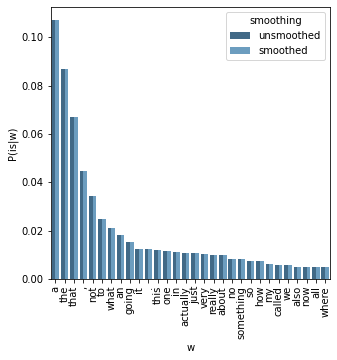

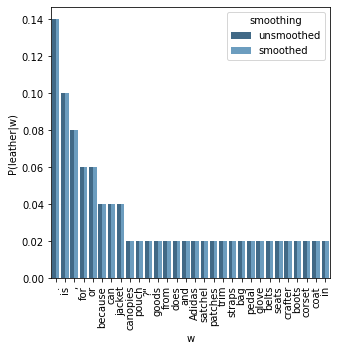

In [ ]:
## YOUR CODE HERE ##
plot_bigram_dist('is', bigram, bigram_smoothed, k=30)
plot_bigram_dist('leather', bigram, bigram_smoothed, k=30)

***Answer (a)***

*The effect of smoothing in the bigram distribution of frequent words is marginal, as portrayed by the graphs. No visual clue shows any difference between the normal and smoothed bigram distributions. However, there does exist a small difference, as can be seen with the example print below this cell.*

*When looking at less common occurences, it becomes apparent that there is a starker relative contrast between the two, as the chance is raised from $P(w_n|w_{n-1}) = 0$ to $P(w_n|w_{n-1}) = \frac{k}{N + k|V|}$ instead. The less common the word, the stronger the smoothing effect: it becomes relatively more significant for the overal predication chance for that word. For very common words, the effect is relatively marginal (and hardly noticeable). This proves that the k-smoothing has little effect on the more common words, and thus does not 'disrupt' the entire vocabulary distribution to the point where it would become unrealistic.*



In [ ]:
print('leather -> jacket (normal):  ' , cond['leather',]['jacket'])
print('leather -> jacket (smoothed):' , cond_smoothed['leather',]['jacket'])
print()
print('leather -> pocket (normal):  ' ,cond['leather',]['his'])
print('leather -> pocket (smoothed):' , cond_smoothed['leather',]['his'])

leather -> jacket (normal):   0.04
leather -> jacket (smoothed): 0.040000003560776126

leather -> pocket (normal):   0.0
leather -> pocket (smoothed): 1.780388064064772e-07


***Answer (b)***

*We repeat the previous steps, but added with a language model with a small k of 0.05 instead of 1. Results are in the cell below. The graphs are created using the small-k smoothed distribution.*

*We see that a smaller k constitutes an even smaller impact to every word. However, the relative increase for uncommon words is still very significant compared to an unsmoothed distribution, and therefore still serves its purpose while 'disrupting' the distribution to an even lesser extent than with k=1.*

*Perhaps we can conclude that a smaller number for k-smoothing still provides the desired results while minimally impacting the original set distribution, and is thus an improvement over a k-number of 1. Of course, parameter optimalization could eventually be used to find an optimal number for k.*

leather -> jacket (normal):   0.04
leather -> jacket (smoothed): 0.040000003560776126
leather -> jacket (small k):  0.04000000356075204

leather -> pocket (normal):   0.0
leather -> pocket (smoothed): 1.780388064064772e-07
leather -> pocket (small k):  1.78037601897596e-07



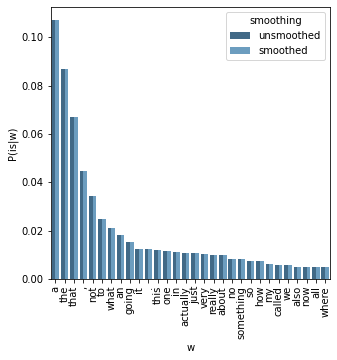

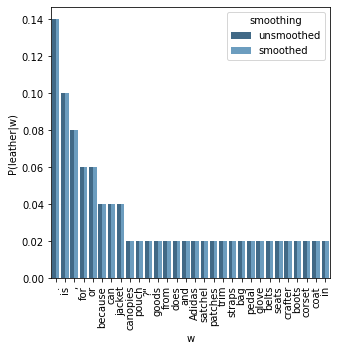

In [ ]:
bigram_s_small, unigram_s_small, cond_s_small = train_ngram(data, N=2, k=0.05)

plot_bigram_dist('is', bigram, bigram_s_small, k=30)
plot_bigram_dist('leather', bigram, bigram_s_small, k=30)

print('leather -> jacket (normal):  ' , cond['leather',]['jacket'])
print('leather -> jacket (smoothed):' , cond_smoothed['leather',]['jacket'])
print('leather -> jacket (small k): ' , cond_s_small['leather',]['jacket'])
print()
print('leather -> pocket (normal):  ' ,cond['leather',]['his'])
print('leather -> pocket (smoothed):' , cond_smoothed['leather',]['his'])
print('leather -> pocket (small k): ' , cond_s_small['leather',]['his'])
print()


**Recall** that if we have a sentence $w_1,\dots,w_n$ we can write

$$P(w_1\dots w_n) = P(w_1)P(w_2|w_1) \cdots P(w_i|w_1 \dots w_{n-1}) \approx P(w_1)P(w_2|w_1)\cdots P(w_{N-1}|w_1\dots w_{N-2})\prod_{i=N}^{n} P(w_i|w_{i-(N-1)}\dots w_{i-1})$$

where in the last step we make an $N$-gram approximation of the full conditionals.

For example, in the case of a bigram (N=2), the above expression reduces to

$$P(w_1 \dots w_n)\approx P(w_1)\prod_{i=2}^{n} P(w_i| w_{i-1}).$$

## Exercise 2.4 (5 points)

The following sentences are taken from the **training data**. Use your **unsmoothed unigram**, **bigram**, and **trigram** language model to estimate their **probabilities**:

    1. Every day was about creating something new .
    2. In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought 
       together in a collision , producing a burst of pure energy .

**Repeat** this with the **smoothed (add-1)** versions of the N-grams. What is the effect of smoothing on the probabilities?


In [ ]:
lines = [
  'Every day was about creating something new .',
  'In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought together in a collision , producing a burst of pure energy .',
]

def makeSentences(lines):
  data2 = []
  # w2i will automatically keep a counter to asign to new words
  w2i = defaultdict(lambda: len(w2i))
  i2w = dict()
  start = "<s>"
  end = "</s>"

  for line in lines:
      words = line.strip().split()
      # assign an index to each word
      for w in words:
          i2w[w2i[w]] = w # trick
      
      sent = [start] + words + [end]
      data2.append(sent)

  return data2
data2 = makeSentences(lines)

In [ ]:
def estimate_probability_unigram(sentence):
  probability = 1
  for word in sentence:
    probability *= unigram[word]
  return probability

In [ ]:
def estimate_probability_bigram(sentence, model, N): #can be used for any gram N>1
  probability = 1
  for index in range(len(sentence)):
    if index >= N:
      arr = [sentence[index - (N-i)] for i in range(N)]
      probability *= model[tuple(arr[:-1])][arr[-1]]

  if probability == 0:
    print(sentence)
    print('----', probability)
  return probability

In [ ]:
print("trigram: ", estimate_probability_bigram(data2[0], trigram, 3))
print("bigram: ", estimate_probability_bigram(data2[0], bigram, 2))

print("trigram line 2: ", estimate_probability_bigram(data2[1], trigram, 3))
print("bigram line 2: ", estimate_probability_bigram(data2[1], bigram, 2))

print('-----------')
print("trigram smoothed: ", estimate_probability_bigram(data2[0], trigram_smoothed, 3))
print("bigram smoothed: ", estimate_probability_bigram(data2[0], bigram_smoothed, 2))
print("unigram smoothed: ", estimate_probability_unigram(data2[0]))

print("trigram smoothed line 2: ", estimate_probability_bigram(data2[1], trigram_smoothed, 3))
print("bigram smoothed line 2: ", estimate_probability_bigram(data2[1], bigram_smoothed, 2))
print("unigram smoothed line 2: ", estimate_probability_unigram(data2[1]))


trigram:  1.1268223114593695e-21
bigram:  4.667998867880972e-17
trigram line 2:  5.700507786514413e-98
bigram line 2:  2.0159953795734388e-72
-----------
trigram smoothed:  1.1268229763283591e-21
bigram smoothed:  4.6679990581050084e-17
unigram smoothed:  8.711492631550748e-27
trigram smoothed line 2:  5.7005268930514104e-98
bigram smoothed line 2:  2.0159975855189895e-72
unigram smoothed line 2:  2.7545011290780525e-102


In [ ]:
def estimate_probability_bigram_log(sentence, model, N):
  probability = 0
  for index in range(len(sentence)):
    if index >= N:
      arr = [sentence[index - (N-i)] for i in range(N)]
      probability += math.log(model[tuple(arr[:-1])][arr[-1]])
  return math.exp(probability)

***Answer***

*We can observe that the smoothing algorithm only has an extremely small impact on the first sentence probability, both absolutely and relatively speaking. For the second sentence, the difference grows even smaller. As such, we deduce that the smoothing has had little to no effect on calculating the probabilities for these sentences.*

## Exercise 2.5 (5 points)

The above sentences were taken from the training set, hence they will all have probability greater than 0. The big challenge for our language model are of course with sentence that contain unseen N-grams: if such an N-gram occurs our model immediately assigns the sentence probability zero.

The following three senteces are taken from the **test set** availlable in the file **ted-test.txt**. What probabilities do your smoothed and unsmoothed language models asign in this case?

    1. Because these robots are really safe .
    2. We have sheer nothingness on one side , and we have this vision of a reality that encompasses every 
       conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible 
       reality .

In [ ]:
lines2 = ['Because these robots are really safe .',
      'We have sheer nothingness on one side , and we have this vision of a reality that encompasses every conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible reality .']
data3 = makeSentences(lines2)

print("trigram: ", estimate_probability_bigram(data3[0], trigram, 3))
print("bigram: ", estimate_probability_bigram(data3[0], bigram, 2))

print("trigram smoothed: ", estimate_probability_bigram(data3[0], trigram_smoothed, 3))
print("bigram smoothed: ", estimate_probability_bigram(data3[0], bigram_smoothed, 2))

['<s>', 'Because', 'these', 'robots', 'are', 'really', 'safe', '.', '</s>']
---- 0.0
trigram:  0.0
bigram:  2.6913665324688018e-15
trigram smoothed:  7.814134496175058e-28
bigram smoothed:  2.691366843268513e-15


***Answer***

*We see that the unsmoothed algorithm of the trigram will give a probability of 0.0. If we compare this with the smoothed alogirthm of the trigram, we see it has a probability > 0.0.*

*For the bigram we don't see an big change in the probability, appareantly are all the combinations of words in the bigram of the test set also seen in the training set.*


### [Extra]

**Optional** What percentage of the sentences in the test set get assigned probability 0 under your smoothed and unsmoothed language models? 

In [ ]:
### ANSWER HERE ###

## Exercise 2.6 (5 points)

**Perplexity** is very frequently used **metric** for evaluating probabilistic models such as language models. The perplexity (sometimes called **PP** for short) of a language model on a sentence is the **inverse probability** of the sentence, **normalized** by the number of words:

$$PP(w_1 \dots w_n) = P(w_1\dots w_n)^{-\frac{1}{n}}.$$

Here we can again approximate $P(w_1 \dots w_n)$ with N-gram probabilities, as above.
Note: $(x_1\cdots x_n)^{-\frac{1}{n}}$ is the **geometric mean** of the numbers $x_1,\dots,x_n$. It is like the (regular) artithmetic mean, but with **products** instead of **sums**. The geometric mean is a more natural choice in the case of *PP* because behind $P(w_1\dots w_n)$ is a series of $n$ products ([more here](https://en.wikipedia.org/wiki/Geometric_mean)).



Compute the perplexity of the training sentences from excercise 2.1. What big difference between the **probabilities** of the sentences and the **perplexities** of the sentences do you notice?

In [ ]:
import math

total = 0
for sentence in data:
  try:
    total -= math.log(estimate_probability_bigram_log(sentence, trigram_smoothed, 3))
  except:
    total -= 0

words_count = sum([len(sentence)-1 for sentence in data])
print(math.pow(2, total / words_count))

70.43677584010271


In [ ]:
import math

total = 0
for sentence in data:
  try:
    total -= math.log(estimate_probability_bigram_log(sentence, bigram_smoothed, 2))
  except:
    total -= 0



words_count = sum([len(sentence)-1 for sentence in data])
print(math.pow(2, total / words_count))


out of bounds?
out of bounds?
out of bounds?
out of bounds?
out of bounds?
out of bounds?
out of bounds?
out of bounds?
out of bounds?
out of bounds?
out of bounds?
out of bounds?
out of bounds?
out of bounds?
out of bounds?
out of bounds?
out of bounds?
out of bounds?
out of bounds?
out of bounds?
18.291788592677324


***Answer***

*We see that the perplexity of the bigram is lower than the trigram, this means that the probabilty of the bigram model sentences are higher*

*Also, with some of the probabilities, it get's out of bound which causes python to crash, we've dealt with this by adding 0 since it's so close to 0 that we can dismiss it.*

*Some of the sentences have such low probabilty using the trigram and bigram*

# That's it!

Congratulations, you have made it to the end of the tutorial. Here we will recap the gist of this notebook. 

**Make sure all your cells can be executed and all your answers are there. Then, read on if you're interested!**

-----

By now you should have a solid feeling for the problem of **sparsity in language data**; there's just never enough data. For the task of language modelling, we saw that sparsity is a serious challenge. 

It would be great to be able to model $p(w_n|w_1 \dots w_{n-1})$ for unlimited $n$: the larger $n$ the better our language model should become at capturing the long-range dependencies between words that characterize actual human sentences, and the more probability our model will asign to such sentences as opposed to sentences that are word-soup. But in the N-gram approach, increasing $n$ will quickly kill all generalizing abilities of the model: the model will start to asign probabilities only to sentences it has seen in the training data.

So, where to go from here? Here are three directions that we could head in.

### Smoothing

We have seen one example of smoothing in this lab: add-k smoothing. This is an easy method, both conceptually and implementation-wise. But the results are not great, and the effects it has on the distributions can be extreme.

A much more sophisticated method of smoothing is so-called **Kneser-Ney smoothing**. The method is described in detail in section 4.5 of J&M (3rd edition). This is one of the best performing N-gram smoothing methods, and up to a few years ago a popular implementation of it called [KenLM](https://kheafield.com/code/kenlm/) gave state of the art results.

### From words to characters

In this lab we have considered language modeling as the task of predicting a **word** $w_n$ based on a history of **words** $w_1\cdots w_n$. What if instead we let our basic units of modelling be **characters**? The task then becomes to model $p(c_k\mid c_{k-N-1}\dots c_{k-1})$ where each $c_i$ is now an ASCII character instead of an entire word.

Suddenly sparsity of data is no longer a problem! The set of characters to use is tiny (< 100) compared to even a small-sized vocabulary as today. Have a look at this very illustrative notebook written by Yoav Golberg to see such a method in action: [The unreasonable effectiveness of Character-level Language Models](http://nbviewer.jupyter.org/gist/yoavg/d76121dfde2618422139).

(So what is the downside?)


### Neural language models

The above notebook was actually written as a response to this blog post by Andrej Karpathy: [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). Go ahead and read it if you haven't already: it is a superb introduction to the topic of Recurrent Neural Networks.

Neural language models solve the problem of data sparsity in a different manner. Instead of estimating the probabilities $p(w_k\mid w_{k-N-1}\dots w_{k-1})$ by counting occurences in the data, they use a neural network $f_{\theta}$ parametrized by parameters $\theta$ to predict this probability. The parameters $\theta$ are learned through optimization. 

The simplest approach goes like this: each word in the history $w_{k-N-1}\dots w_{k-1}$ is embedded separately giving  vectors $e_{k-N-1}\dots e_{k-1}$ and then concatenated into one long vectors $[e_{k-N-1};\dots ;e_{k-1}]$. The network then uses this history vector to predict a probability distribution over words $w$ in the vocabulary $V$:

$$p(w \mid w_{k-N-1}\dots w_{k-1}) = f_{\theta}([e_{k-N-1};\dots;e_{k-1}]).$$

(In order to produce legitimate probabilities the final layer of such a network will be for example a $softmax$.)

This provides a solution to the sparsity problem by having the network let the individual embeddings of the words in the history interact through its non-linear transforamtion. We are letting the network figure out the smoothing itself!

RNNs are a clever extension of this idea, where a hidden state vector $h$ is re-used and updated at each step $k$ in order to store the information of the entire history up to step $k-1$. That is, an RNN actually does away with the N-order approximation; it tries to model the full conditional directly! That means that

$$p(w \mid w_1\dots w_{k-1}) \approx RNN_{\theta}([e_{k-1};h_{k-1}])$$

where the hidden state $h_{k-1}$ is a compression of the *entire history* $w_1\dots w_{k-1}$.

Another great place to learn about RNNs, their problems, and solutions to those, is on the blog of [Christopher Olah](http://colah.github.io/posts/2015-08-Understanding-LSTMs/). 

-----------
(And now, it's time to read the classic essay by Eugene Wigner that gave both of the posts their title: [The Unreasonable Effectiveness of Mathematics in the Natural Sciences](http://www.dartmouth.edu/~matc/MathDrama/reading/Wigner.html))


Acknowledgements: Most of this lab was developed in collabnoration with Joost Bastings and Dan Douwe.